In [165]:
# Predicting whether the bank customer will do a deposit or not.

# Building a model
# increasing model accuracy
# saving predicted and actual o/p to csv

# Import the required libraries

In [166]:
import pandas as pd
from sklearn import preprocessing  # for LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [167]:
# for viewing the Classification tree
from sklearn.tree import plot_tree

In [168]:
import seaborn as sns
import matplotlib.pyplot as plt

## Read the Data from the CSV

In [169]:
dummy_df = pd.read_csv('bank.csv')

In [170]:
dummy_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [171]:
dummy_df.isnull().sum().any() # no null values in df

False

## Data Pre-Processing

In [172]:
def preprocessor(df):
    
    # Modifications to the data or indices of res_df will not be reflected in df
    # shallow copy, use deep=False
    res_df = df.copy() # by default, deep copy. 
    
    le = preprocessing.LabelEncoder() # sklearn.preprocessing
    
    # categical variables are converted to numerical variables
    # Encode labels with value between 0 and n_classes-1.
    # ordinal encoding 
    res_df['job'] = le.fit_transform(res_df['job'])
    res_df['marital'] = le.fit_transform(res_df['marital'])
    res_df['education'] = le.fit_transform(res_df['education'])
    res_df['default'] = le.fit_transform(res_df['default'])
    res_df['housing'] = le.fit_transform(res_df['housing'])
    res_df['month'] = le.fit_transform(res_df['month'])
    res_df['loan'] = le.fit_transform(res_df['loan'])
    res_df['contact'] = le.fit_transform(res_df['contact'])
    res_df['day_of_week'] = le.fit_transform(res_df['day'])
    res_df['poutcome'] = le.fit_transform(res_df['poutcome'])
    res_df['deposit'] = le.fit_transform(res_df['deposit'])
#     print(res_df['deposit']) # one whole column with deposit values as 0 0r 1
    return res_df              

In [173]:
encoded_df = preprocessor(dummy_df)

In [174]:
encoded_df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,day_of_week
0,59,0,1,1,0,2343,1,0,2,5,8,1042,1,-1,0,3,1,4
1,56,0,1,1,0,45,0,0,2,5,8,1467,1,-1,0,3,1,4
2,41,9,1,1,0,1270,1,0,2,5,8,1389,1,-1,0,3,1,4


# Descriptive Statistics

In [175]:
dummy_df.job.unique()

array(['admin.', 'technician', 'services', 'management', 'retired',
       'blue-collar', 'unemployed', 'entrepreneur', 'housemaid',
       'unknown', 'self-employed', 'student'], dtype=object)

In [176]:
encoded_df.job.unique()

array([ 0,  9,  7,  4,  5,  1, 10,  2,  3, 11,  6,  8])

In [177]:
print(dummy_df.loan.unique()) 
print(encoded_df.loan.unique())

['no' 'yes']
[0 1]


In [178]:
print(dummy_df.marital.unique()) 
print(encoded_df.marital.unique())

['married' 'single' 'divorced']
[1 2 0]


In [179]:
dummy_df.education.unique()

array(['secondary', 'tertiary', 'primary', 'unknown'], dtype=object)

In [180]:
print(dummy_df.default.unique())
print(encoded_df.default.unique())

['no' 'yes']
[0 1]


In [181]:
print(dummy_df.contact.unique())
print(encoded_df.contact.unique())

['unknown' 'cellular' 'telephone']
[2 0 1]


In [182]:
print(dummy_df.day.unique())
print(encoded_df.day_of_week.unique()) # this is not day_of_week, it should be day_of_month

[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31]
[ 4  5  6  7  8 11 12 13 14 15 18 19 20 22 25 26 27 28 29  1  2  3 10 16
 17 23  0  9 21 24 30]


In [183]:
print(dummy_df.poutcome.unique())
print(encoded_df.poutcome.unique())
print(dummy_df.deposit.unique())
print(encoded_df.deposit.unique())

['unknown' 'other' 'failure' 'success']
[3 1 0 2]
['yes' 'no']
[1 0]


In [184]:
dummy_df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


{'whiskers': [<matplotlib.lines.Line2D at 0x17d35fe13c8>,
 'caps': [<matplotlib.lines.Line2D at 0x17d36009908>,
 'boxes': [<matplotlib.lines.Line2D at 0x17d36005988>],
 'medians': [<matplotlib.lines.Line2D at 0x17d36009f08>],
 'fliers': [<matplotlib.lines.Line2D at 0x17d36009f88>],
 'means': []}

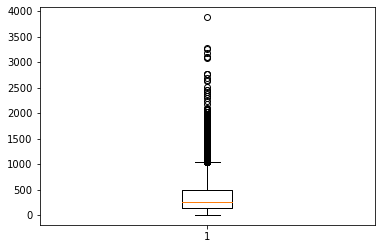

In [185]:
plt.boxplot(dummy_df.duration)

In [186]:
sum(dummy_df.duration>=1000) # outliers

707

In [187]:
sum(dummy_df.duration<1000) # rest of the values

10455

In [188]:
10455+707 # just validation the sum

11162

In [189]:
# in the outlier region for duration, 636 had deposits and 71 didn't have deposits
sum(dummy_df[dummy_df.duration>=1000].deposit=='yes'),sum(dummy_df[dummy_df.duration>=1000].deposit=='no')

(636, 71)

In [190]:
636+71 # outliers for duration

707

In [191]:
# not-outlier region for duration - have deposits and don't have deposits
sum(dummy_df[dummy_df.duration<1000].deposit=='yes'),sum(dummy_df[dummy_df.duration<1000].deposit=='no')

(4653, 5802)

In [192]:
4653+5802

10455

In [193]:
# % of deposit=yes in duration outlier region vs deposit=yes in duration not-outlier region
636/707, 4653/10455

(0.8995756718528995, 0.44505021520803445)

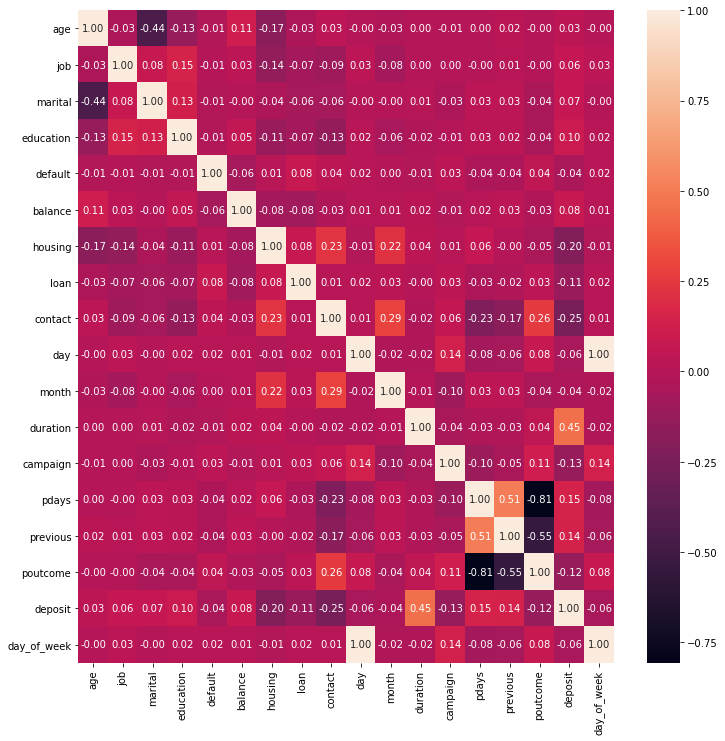

In [194]:
plt.subplots(figsize=(12,12))
sns.heatmap(encoded_df.corr(),annot=True, fmt='.2f')

In [195]:
# taking the variance of each columns in encoded_df
for i in encoded_df.columns:
    print(i,end=' ')
print()   
print(list(round(encoded_df[i].var(),3) for i in encoded_df.columns))

age job marital education default balance housing loan contact day month duration campaign pdays previous poutcome deposit day_of_week 
[141.928, 10.401, 0.391, 0.562, 0.015, 10403291.123, 0.249, 0.114, 0.67, 70.909, 10.188, 120498.116, 7.41, 11828.364, 5.253, 1.006, 0.249, 70.909]


In [196]:
encoded_df.marital.var()

0.39131575074533675

### analysing 'default' column, whether it can be dropped

In [197]:
len(cleaned_df[cleaned_df.default==0]) #default='no'

10994

In [198]:
len(cleaned_df[(cleaned_df.default==0) & (cleaned_df.deposit==0)]) #default='no' and deposit='no'

5757

In [199]:
len(cleaned_df[(cleaned_df.default==0) & (cleaned_df.deposit==1)]) #default='no' and deposit='yes'

5237

In [200]:
len(cleaned_df[cleaned_df.default==1]) #default='yes'

168

In [201]:
len(cleaned_df[(cleaned_df.default==1) & (cleaned_df.deposit==0)]) #default='no' and deposit='no'

116

In [202]:
len(cleaned_df[(cleaned_df.default==1) & (cleaned_df.deposit==1)]) #default='yes' and deposit='yes'

52

In [203]:
# total deposit='yes'
5237+52

5289

In [204]:
(5237/5289), 52/5289, 5237/10994, 52/168

(0.990168273775761,
 0.009831726224238986,
 0.4763507367655085,
 0.30952380952380953)

In [205]:
# total default='yes' out of 11162 is very less
print(f"{len(cleaned_df[cleaned_df.default==1])} default=='yes' out of 11162 which is {round((168/11162)*100,2)}% of 11162")

168 default=='yes' out of 11162 which is 1.51% of 11162


In [206]:
cleaned_df.default.describe()

count    11162.000000
mean         0.015051
std          0.121761
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default, dtype: float64

In [207]:
cleaned_df.default.var()

0.014825859769940705

[]

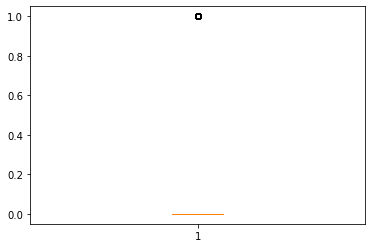

In [208]:
plt.boxplot(cleaned_df.default)
plt.plot()

In [209]:
# 'default' column has weak correlation with 'deposit' column
# only 1.51% of the data are default==1
# default has variance = 0.015 which is close to zero
# so 'default' column can be dropped

### analysing 'loan' column whether it can be dropped

In [210]:
# total loan out of 11162
print(f"{len(cleaned_df[cleaned_df.loan==1])} loan=='yes' out of 11162 which is {round((1460/11162)*100,2)}% of 11162")

1460 loan=='yes' out of 11162 which is 13.08% of 11162


In [211]:
# for deposit=='no', loan=='no' and  loan=='yes' 
len(cleaned_df[(cleaned_df.loan==0) & (cleaned_df.deposit==0)]), len(cleaned_df[(cleaned_df.loan==1) & (cleaned_df.deposit==0)]) 

(4897, 976)

In [212]:
# for deposit=='yes', loan=='no' and  loan=='yes' 
len(cleaned_df[(cleaned_df.loan==0) & (cleaned_df.deposit==1)]), len(cleaned_df[(cleaned_df.loan==1) & (cleaned_df.deposit==1)]) 

(4805, 484)

### analysing 'pdays' and 'poutcome' columns

In [213]:
encoded_df.pdays.describe()

count    11162.000000
mean        51.330407
std        108.758282
min         -1.000000
25%         -1.000000
50%         -1.000000
75%         20.750000
max        854.000000
Name: pdays, dtype: float64

### If the column has zero variance or Near zero then remove.
### If two features are highly corelated, then can we remove either of those feature.
### If the corr coeff b/w a feature and the target is less than +.01 and -.01, then don't remove.
### So working again, from encoded_df

In [214]:
encoded_df.default.var()

0.014825859769940705

In [215]:
# dropping columns with Near-Zero variance - default
# day and day_of_week are highly correlated, dropping day_of_week
# pdays and poutcome are highly correlated, dropping poutcome
cleaned_2df=encoded_df.drop(['default','day_of_week','poutcome'],axis=1)

In [216]:
cleaned_2df.head(2)

,age,job,marital,education,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,deposit
0,59,0,1,1,2343,1,0,2,5,8,1042,1,-1,0,1
1,56,0,1,1,45,0,0,2,5,8,1467,1,-1,0,1


In [217]:
x = cleaned_2df.drop(['deposit'],axis=1).values  # axis = {0 or 'index', 1 or 'columns'}, default 0
y = cleaned_2df['deposit'].values

In [218]:
x

array([[ 59,   0,   1, ...,   1,  -1,   0],
       [ 56,   0,   1, ...,   1,  -1,   0],
       [ 41,   9,   1, ...,   1,  -1,   0],
       ...,
       [ 32,   9,   2, ...,   2,  -1,   0],
       [ 43,   9,   1, ...,   2, 172,   5],
       [ 34,   9,   1, ...,   1,  -1,   0]], dtype=int64)

## Split the  cleaned_df data into Train-Test 

In [219]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size =0.2)

## Build the Decision Tree Model using cleaned_df

In [220]:
model_dt_2.fit(x_train, y_train) # Build a decision tree classifier from the training set (X, y)
model_dt_2_score_train = model_dt_2.score(x_train, y_train) # Return the mean accuracy of the given test data and labels
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = model_dt_2.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

Training score:  0.710605890917236
Testing score:  0.7075682937751904


In [221]:
f # Decision tree with depth = 4
model_dt_4 = DecisionTreeClassifier(random_state=1, max_depth=4)
model_dt_4.fit(x_train, y_train)
model_dt_4_score_train = model_dt_4.score(x_train, y_train)
print("Training score: ",model_dt_4_score_train)
model_dt_4_score_test = model_dt_4.score(x_test, y_test)
print("Testing score: ",model_dt_4_score_test)

Training score:  0.7878821816552806
Testing score:  0.7666815942678011


In [222]:
# Decision tree with depth = 8
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini")
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8607906820472617
Testing score:  0.8087774294670846


In [223]:
# running into over-fitting
# Decision tree with depth = 9
model_dt_9 = DecisionTreeClassifier(random_state=1, max_depth=9, criterion = "gini")
model_dt_9.fit(x_train, y_train)
model_dt_9_score_train = model_dt_9.score(x_train, y_train)
print("Training score: ",model_dt_9_score_train)
model_dt_9_score_test = model_dt_9.score(x_test, y_test)
print("Testing score: ",model_dt_9_score_test)

Training score:  0.8732220853399036
Testing score:  0.8101209135691895


In [224]:
# Decision tree with depth = 10
model_dt_10 = DecisionTreeClassifier(random_state=1, max_depth=10, criterion = "gini")
model_dt_10.fit(x_train, y_train)
model_dt_10_score_train = model_dt_10.score(x_train, y_train)
print("Training score: ",model_dt_10_score_train)
model_dt_10_score_test = model_dt_10.score(x_test, y_test)
print("Testing score: ",model_dt_10_score_test)

Training score:  0.8906932467241573
Testing score:  0.8087774294670846


In [225]:
# Decision tree with depth = 15
# criterion = "gini" by default
model_dt_15 = DecisionTreeClassifier(random_state=1, max_depth=15)
model_dt_15.fit(x_train, y_train)
model_dt_15_score_train = model_dt_15.score(x_train, y_train)
print("Training score: ",model_dt_15_score_train)
model_dt_15_score_test = model_dt_15.score(x_test, y_test)
print("Testing score: ",model_dt_15_score_test)

Training score:  0.9631537686191063
Testing score:  0.7984773846842812


In [226]:
# Decision tree with depth = 15, criterion = "entropy"
model_dt_15 = DecisionTreeClassifier(random_state=1, max_depth=15, criterion = "entropy")
model_dt_15.fit(x_train, y_train)
model_dt_15_score_train = model_dt_15.score(x_train, y_train)
print("Training score: ",model_dt_15_score_train)
model_dt_15_score_test = model_dt_15.score(x_test, y_test)
print("Testing score: ",model_dt_15_score_test)

Training score:  0.9460185911076269
Testing score:  0.7948947604120018


In [227]:
# Decision tree with depth = 20
# criterion = "gini" by default
# min_samples_leaf is 1 by default
model_dt_20 = DecisionTreeClassifier(random_state=1, max_depth=20)
model_dt_20.fit(x_train, y_train)
model_dt_20_score_train = model_dt_20.score(x_train, y_train)
print("Training score: ",model_dt_20_score_train)
model_dt_20_score_test = model_dt_20.score(x_test, y_test)
print("Testing score: ",model_dt_20_score_test)

Training score:  0.9901444730652929
Testing score:  0.7854903716972682


In [228]:
# Decision tree with depth = 20, min_samples_leaf=10
# criterion = "gini" by default
model_dt_20 = DecisionTreeClassifier(random_state=1, max_depth=20, min_samples_leaf=10)
model_dt_20.fit(x_train, y_train)
model_dt_20_score_train = model_dt_20.score(x_train, y_train)
print("Training score: ",model_dt_20_score_train)
model_dt_20_score_test = model_dt_20.score(x_test, y_test)
print("Testing score: ",model_dt_20_score_test)

Training score:  0.8816216821592564
Testing score:  0.8038513210927004


In [229]:
# Decision tree with depth = 5
model_dt_5 = DecisionTreeClassifier(random_state=1, max_depth=5, criterion = "gini")
model_dt_5.fit(x_train, y_train)
model_dt_5_score_train = model_dt_5.score(x_train, y_train)
print("Training score: ",model_dt_5_score_train)
model_dt_5_score_test = model_dt_5.score(x_test, y_test)
print("Testing score: ",model_dt_5_score_test)

Training score:  0.8090491656400493
Testing score:  0.800268696820421


In [230]:
# Decision tree with depth = 6
model_dt_6 = DecisionTreeClassifier(random_state=1, max_depth=6, criterion = "gini")
model_dt_6.fit(x_train, y_train)
model_dt_6_score_train = model_dt_6.score(x_train, y_train)
print("Training score: ",model_dt_6_score_train)
model_dt_6_score_test = model_dt_6.score(x_test, y_test)
print("Testing score: ",model_dt_6_score_test)

Training score:  0.8162168215925636
Testing score:  0.7975817286162113


In [231]:
# Decision tree with depth = 7
model_dt_7 = DecisionTreeClassifier(random_state=1, max_depth=7, criterion = "gini")
model_dt_7.fit(x_train, y_train)
model_dt_7_score_train = model_dt_7.score(x_train, y_train)
print("Training score: ",model_dt_7_score_train)
model_dt_7_score_test = model_dt_7.score(x_test, y_test)
print("Testing score: ",model_dt_7_score_test)

Training score:  0.8359278754619778
Testing score:  0.8069861173309449


In [232]:
# Decision tree with depth = 8 and min_samples_leaf=10
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini",min_samples_leaf=10)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8492552357486841
Testing score:  0.8114643976712942


In [233]:
# Decision tree with depth = 8 and min_samples_leaf=3
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini",min_samples_leaf=3)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.858326800313585
Testing score:  0.8034034930586654


In [234]:
# Decision tree with depth = 8 and min_samples_leaf=2
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini",min_samples_leaf=2)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8597827304289394
Testing score:  0.8074339453649798


In [235]:
# Decision tree with depth = 8 and min_samples_split=10
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=10)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8572068540710046
Testing score:  0.8087774294670846


In [266]:
# Decision tree with depth = 8 and min_samples_split=100
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=100)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8417515959233957
Testing score:  0.8141513658755039


In [237]:
# Decision tree with depth = 8 and min_samples_split=50
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=50)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8498152088699742
Testing score:  0.8159426780116436


In [238]:
# Decision tree with depth = 8 and min_samples_split=25
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=25)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8528390637249412
Testing score:  0.8110165696372593


In [239]:
# Decision tree with depth = 8 and min_samples_split=15
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=15)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.855302945458618
Testing score:  0.8083296014330497


In [240]:
# Decision tree with depth = 8,  min_samples_leaf=2 and min_samples_split=10
model_dt_8 = DecisionTreeClassifier(random_state=1, max_depth=8, criterion = "gini", min_samples_split=10, 
                                   min_samples_leaf=2)
model_dt_8.fit(x_train, y_train)
model_dt_8_score_train = model_dt_8.score(x_train, y_train)
print("Training score: ",model_dt_8_score_train)
model_dt_8_score_test = model_dt_8.score(x_test, y_test)
print("Testing score: ",model_dt_8_score_test)

Training score:  0.8574308433195207
Testing score:  0.8101209135691895


## 10-Fold Cross Validation

In [241]:
from sklearn.model_selection import cross_val_score

# Decision tree with depth = 8 and min_samples_split=100
all_accuracies= cross_val_score(estimator=model_dt_8, X=x, y=y, cv=10)
all_accuracies, all_accuracies.mean(), all_accuracies.std()
# not much improvement in accuracy after cross-validation also

(array([0.65443151, 0.83169203, 0.70519713, 0.77329749, 0.73387097,
        0.79928315, 0.78225806, 0.83154122, 0.80734767, 0.81451613]),
 0.7733435373167373,
 0.055441320983832774)

## Performance Metrics

In [242]:
# Decision tree with depth = 8 and min_samples_leaf=3
model_dt_8.predict_proba(x_test).shape

(2233, 2)

In [243]:
11162*2/10

2232.4

In [244]:
# Predict class probabilities of x_test
# The predicted class probability is the fraction of samples of the same class in a leaf
model_dt_8.predict_proba(x_test)

array([[0.37125749, 0.62874251],
       [0.0786802 , 0.9213198 ],
       [0.        , 1.        ],
       ...,
       [0.10281518, 0.89718482],
       [0.        , 1.        ],
       [0.26384365, 0.73615635]])

In [245]:
y_pred_dt=model_dt_8.predict_proba(x_test)[:,1]
y_pred_dt

array([0.62874251, 0.9213198 , 1.        , ..., 0.89718482, 1.        ,
       0.73615635])

In [246]:
roc_curve(y_test, y_pred_dt) 

(array([0.        , 0.01273345, 0.01443124, 0.01697793, 0.02207131,
        0.0237691 , 0.02716469, 0.03395586, 0.03565365, 0.04159593,
        0.04159593, 0.05857385, 0.05857385, 0.05857385, 0.06027165,
        0.06706282, 0.06876061, 0.07809847, 0.07809847, 0.07894737,
        0.09677419, 0.09847199, 0.10186757, 0.10356537, 0.10356537,
        0.10526316, 0.10611205, 0.10696095, 0.12903226, 0.12903226,
        0.13327674, 0.13752122, 0.13837012, 0.14855688, 0.14855688,
        0.15110357, 0.15195246, 0.15280136, 0.16468591, 0.1655348 ,
        0.1655348 , 0.1655348 , 0.16808149, 0.17826825, 0.18081494,
        0.18166384, 0.18505942, 0.19185059, 0.19269949, 0.20967742,
        0.21052632, 0.21646859, 0.26825127, 0.27334465, 0.28438031,
        0.2860781 , 0.29286927, 0.29286927, 0.34465195, 0.35144312,
        0.41001698, 0.41511036, 0.41765705, 0.4524618 , 0.4524618 ,
        0.47028862, 0.47113752, 0.47113752, 0.47198642, 0.55178268,
        0.55348048, 0.55687606, 0.59337861, 0.60

In [247]:
fpr,tpr,_ = roc_curve(y_test, y_pred_dt) # y_True, y_score
roc_auc_dt = auc(fpr, tpr) # Compute Area Under the Curve (AUC) 
roc_auc_dt

0.8706985894640287

In [249]:
predictions = model_dt_8.predict(x_test) # predict class of x_test
predictions

array([1, 1, 1, ..., 1, 1, 1])

In [250]:
sum(predictions)

1051

In [251]:
# # Model Accuracy
print (model_dt_8.score(x_test, y_test))
y_test

0.8101209135691895


array([1, 1, 0, ..., 1, 1, 0])

### Confusion Matrix

In [254]:
confusion_matrix(y_test, predictions) #y_true,y_pred
# the count of true negatives is :math:`C_{0,0}`, false negatives is :math:`C_{1,0}`
# true positives is :math:`C_{1,1}` and false positives is :math:`C_{0,1}`.

array([[968, 210],
       [214, 841]], dtype=int64)

In [255]:
accuracy_score(y_test, predictions)

0.8101209135691895

In [256]:
conf_matrix= confusion_matrix(y_test, predictions)
(conf_matrix[0][0]+conf_matrix[1][1])/conf_matrix.sum()

0.8101209135691895

In [257]:
982/(982+231)

0.809563066776587

# Writing predicted_output and actual_output along with customer data to csv

In [268]:
df=pd.DataFrame(columns=cleaned_df.columns[:-1], data=x_test)
df['predicted_output']=predictions
df['actual_output']=y_test
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,duration,campaign,pdays,previous,poutcome,predicted_output,actual_output
0,22,8,2,1,1522,0,0,0,30,10,368,2,-1,0,1,1
1,31,9,2,2,882,0,0,0,4,11,293,1,93,1,1,1
2,76,5,1,0,163,0,0,1,13,10,120,1,-1,0,1,0


In [263]:
# accuracy=TP+TN(TP+TN+FP+FN)
tp_count, tn_count, fp_count, fn_count=0,0,0,0
for i in df.iterrows():
    if i[1].predicted_output==1 and i[1].actual_output==1:
        tp_count+=1
    if i[1].predicted_output==0 and i[1].actual_output==0:
        tn_count+=1
    if i[1].predicted_output==1 and i[1].actual_output==0:
        fp_count+=1
    if i[1].predicted_output==0 and i[1].actual_output==1:
        fn_count+=1
tp_count,tn_count,fp_count, fn_count

(841, 968, 210, 214)

## Model Prediction Accuracy

In [264]:
accuracy=(tp_count+tn_count)/(tp_count+tn_count+fp_count+fn_count)
accuracy

0.8101209135691895

In [269]:
# write dataframe to CSV
df.to_csv('bank_model_output.csv',index=False)